# Rotating Bar

[![Google Collab Book](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tum-pbs/PhiFlow/blob/develop/examples/grids/Rotating_Bar.ipynb)

This example simulates fluid flow around a rotating bar.

In [1]:
%pip install --quiet phiflow
from phi.jax.flow import *
# from phi.flow import *  # If JAX is not installed. You can use phi.torch or phi.tf as well.
from tqdm.notebook import trange

We start by defining the rotating bar in its initial orientation as well as the initial velocity field.

<Figure size 864x360 with 1 Axes>

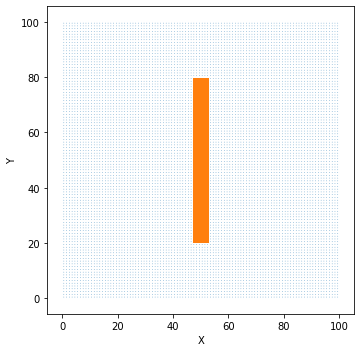

In [35]:
bar = Obstacle(Cuboid(vec(x=50, y=50), x=6, y=60), angular_velocity=0.05)
v0 = StaggeredGrid(0, ZERO_GRADIENT, Box(x=100, y=100), x=100, y=100)
plot(v0, bar.geometry, overlay='args')

Next, we define the simulation step consisting of fluid advection, bar rotation, and incompressibility.

In [36]:
@jit_compile
def step(v, p, bar: Obstacle, dt=1.):
    bar = bar.rotated(bar.angular_velocity * dt)
    v = advect.mac_cormack(v, v, dt)
    v, p = fluid.make_incompressible(v, bar, Solve(x0=p))
    return v, p, bar

In [37]:
v_trj, p_trj, bar_trj = iterate(step, batch(time=100), v0, None, bar, range=trange)

  0%|          | 0/100 [00:00<?, ?it/s]

Let's animate the x and y component of the velocity field separately.

In [39]:
plot(dict(**v_trj.vector), bar_trj.geometry, overlay='args', animate='time')